# Coursera Course Analysis
### 1 About Coursera
Coursera Inc. is a U.S.-based massive open online course provider founded in 2012 by Stanford University computer science professors Andrew Ng and Daphne Koller. Coursera works with universities and other organizations to offer online courses, certifications, and degrees in a variety of subjects.
#### 1.1 About the Dataset
Course dataset scrapped from Coursera website
#### 1.2 Context
This dataset contains a data that helps any new learner get the right course to learn by just answering a few questions.
#### 1.3 Content
This dataset contains mainly 6 columns and 890 course data. The detailed description:

<ol>
    <li>course_title: Contains the course title.</li>
    <li>course_organization: It tells which organization is conducting the courses.</li>
    <li>course_Certificate_type: contains information on different certifications available in courses</li>
    <li>course_rating: It has the ratings associated with each course</li>
    <li>course_difficulty: It tells difficulty level of the courses</li>
    <li>course_students_enrolled: It has the number of students enrolled in the course</li>
</ol>

### 2. Data Loading and Basic Data Cleaning
#### 2.1 Required Modules

In [64]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from typing import List
from wordcloud import WordCloud
%matplotlib inline
sb.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [65]:
def load_data():
    '''Loads csv data into a dataframe'''
    
    return pd.read_csv("Data/coursea_data.csv")

In [66]:
#load data
data = load_data()
data.drop(columns = 'Unnamed: 0', inplace = True)
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### 2.2 Cleaning Data
<ul>
    <li>Converting data into a suitable format/data type</li>
    <li>Handling Missing Values</li>
    <li>Removing duplicate features and samples</li>
    <li>Treating outliers</li>
</ul>

#### 2.2.1 Data types
In the DataFrame a feature named course_students_enrolled is supposed to be a numeric type, but it's represented as string. Therefore it needs to be converted to a numeric type.

In [67]:
#change feature into a float type
converter = {'k':1000, 'm':1000000}
for idx, num in enumerate(data.course_students_enrolled):
    data.course_students_enrolled[idx] = float(str(num[:-1])) * converter[num[-1]]     

#### 2.2.2 Data Information and Handling Missing Values
Numeric features are features whose values can be measured, whereas values of categorical cannot be counted.<br>
Numeric and categoric features of a DataFrame can be found by using `select_dtypes(include = np.number)`, and `select_dtypes(exclude = np.number)` respectively.

In [68]:
data.select_dtypes(include = np.number).columns

Index(['course_rating'], dtype='object')

The dataset contains 2 numerical features, that is course rating and number of students enrolled.

In [30]:
data.select_dtypes(exclude = np.number).columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_difficulty', 'course_students_enrolled'],
      dtype='object')

The dataset contains 4 non-numeric features, that is course title, difficulty level, organization providing the course and types of certification

In [31]:
#Handle misssing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


The above output shows there are 891 observations of 6 variables. <br>
All the variables have 891 records, indicating there's no missing value in the data. 

In [32]:
#remove duplicate features and samples
data.drop_duplicates()
data.duplicated().sum()

0

The above output indicates that, the data does not contain any duplicated records

#### 2.2.3 Treating outliers
Outliers are measure that significantly differ from other data points.
For this method the following two techniques are used to detect outliers

<ol>
    <li>Interquartile Range(IQR)</li>
    <li>visualization with Box Plot</li>
</ol>

##### Interquartile Range (IQR)
IQR is a measure of statistical dispersion. <br>
$$ IQR = Q3-Q1 $$ 
Where Q1, and Q3 represents 25th and 75th percentile respectively <br>
A data point <b><i>X</i></b> is outlier if $$ (X < (Q1 - 1.5 * IQR))  or  (X > Q3 + (1.5 * IQR)) $$



In [33]:
#determine IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

course_rating    0.2
dtype: float64

In [34]:
# find a data point that falls in range of outlier (those data's will be represented as True)
outliers = ((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))
outliers[outliers == True].count()

course_Certificate_type      0
course_difficulty            0
course_organization          0
course_rating               17
course_students_enrolled     0
course_title                 0
dtype: int64

IQR outlier analysis shows that, feature course_rating and course_students_enrolled contians a data point that are outliers. 

In [35]:
def makePlot(plot_type:str, data:pd.DataFrame, \
                    feature:str, title:str = '', label:str = '', label2:str = '')->None:
    ax = None
    plt.figure(figsize=(6,5))
    if plot_type == 'boxplot':
        plt.boxplot(data =data , x = feature);
    else:
        ax = sb.countplot(data = data, x = feature)
    plt.xlabel(label2)
    plt.ylabel(label)
    plt.title(title)
    
    if ax is not None:
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
            x = p.get_x() + p.get_width() - 0.5
            y = p.get_height() + 0.1
            ax.annotate(percentage, (x, y))
    plt.show()

#### Visualizing Outliers With Boxplot
Boxplot is a method for graphically depicting groups of numerical data through their quartiles.
Boxplot also has a vertical line that indicates first, and third quartile. If there's a datapoint that does not lie in between the start and end of this vertical line, that indicates an existence of outliers. This outliers is usually depicted using small circle

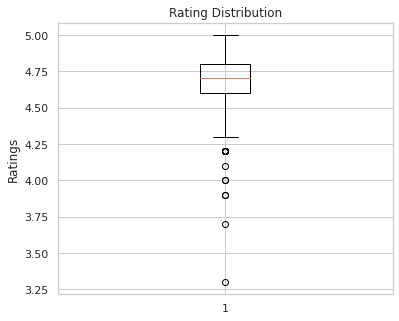

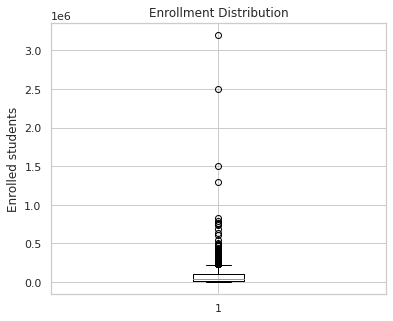

In [69]:
#draw boxplot for course_rating and number_students_enrolled
makePlot('boxplot', data, 'course_rating', 'Rating Distribution', 'Ratings',)
makePlot('boxplot', data, 'course_students_enrolled','Enrollment Distribution', 'Enrolled students',)

The above boxplot graph shows that course_rating and course_students_enrolled feature has an outlier datapoint in their measurement.<br>
This Plot also confirms with the result of IQR analysis.

### 3. Exploratory Data Analysis.

In [37]:
def mostFrequent(df:pd.DataFrame, feature:str, maxLimit:int)->pd.DataFrame:
    '''Returns the most repeated entries of a certain feature limiting it to maxLimit'''
    
    top_limit = df[feature].value_counts()[:int(maxLimit)].index
    return df[df[feature].isin(top_limit)]

In [38]:
def getTop(data:pd.DataFrame, key:str, maxLimit:int)->pd.DataFrame:
    '''Returns the top maxLimit dataframes based on a certain feature '''
    
    return pd.DataFrame(data.sort_values(key, ascending = False)).head(maxLimit)

In [39]:
def findByName(df:pd.DataFrame, feature:str, key):
    '''returns a dataframe that has a certain string included in a given feature'''
    
    mask = df[feature].str.find(key) != -1
    return df[mask]

In [40]:
def makeQuery(df:pd.DataFrame, feature:str, condition:str)->pd.DataFrame:
    '''Returns result of sorted DataFrame based on certain features'''

    query_string = feature + condition
    return df.query(query_string)

In [41]:
def relateFeature(df:pd.DataFrame, groupKey:str, feature:str, function:str):
    '''Returns a DataFrame of certain features grouped together'''
    
    result = None
    if function == 'count':
        result = df.groupby(groupKey)[feature].count().reset_index().sort_values(feature)
    elif function == 'mean':
        result = df.groupby(groupKey)[feature].mean().reset_index().sort_values(feature)
    return result

In [42]:
def averageRating(df:pd.DataFrame, organization:str, level:str)->float:
    '''Returns result of sorted DataFrame based on certain features'''
    
    query_string = 'course_organization ==\'' + organization + \
                   '\' and course_difficulty ==\'' + level + '\''
    return np.round(df.query(query_string)['course_rating'].mean(), 3)


#### 3.1 Types of Certification

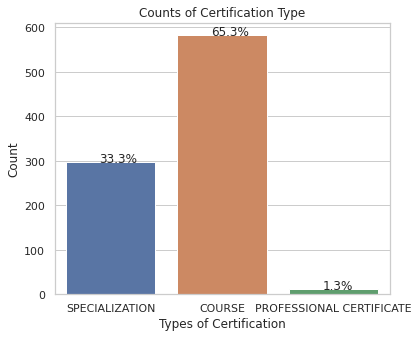

In [43]:
#relationship between certification and course counts
ylabel = 'Count'
xlabel = 'Types of Certification'
title = 'Counts of Certification Type'
makePlot('seaborn', data, 'course_Certificate_type',title, ylabel, xlabel)

The above plot shows that normal course certificates are more popular (with more than 65% of total courses) than professional and specialization certificates.

#### 3.2 Difficulty Level of Courses

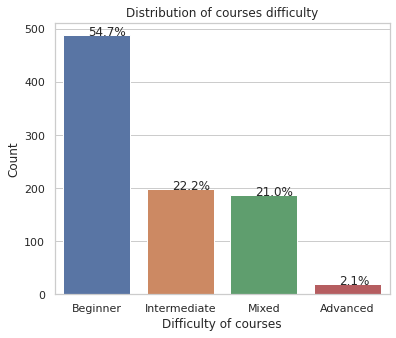

In [44]:
xlabel = 'Difficulty of courses'
title = 'Distribution of courses difficulty'
makePlot('seaborn', data, 'course_difficulty',title, ylabel, xlabel)

The above analysis shows that 54.7% of courses on coursera are for beginners.
On the contrary, courses that has Advanced level of difficulty are much less popular 

#### 3.3 Course Certification and Course Difficulty Level

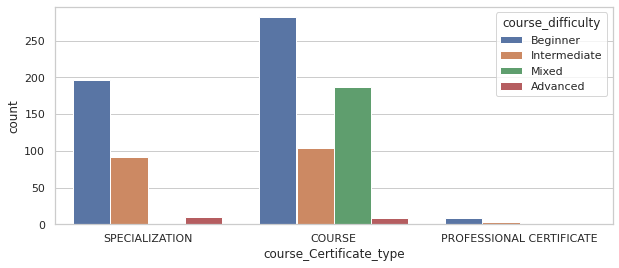

In [45]:
plt.figure(figsize = (10, 4))
sb.countplot(data = data , x = 'course_Certificate_type' , hue = 'course_difficulty')
plt.show()

#### 3.4 Comparing University and Other Organizations on Coursera

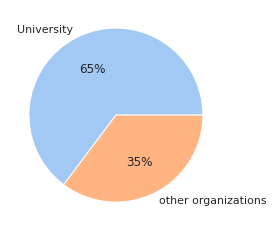

In [46]:
#comparing university and other organizations on coursera
university_organizations = findByName(data, 'course_organization', 'University').shape[0]
total_organizations = [university_organizations, data.shape[0] - university_organizations]
colors = sb.color_palette('pastel')
plt.pie(total_organizations, labels=["University", "other organizations"], colors=colors, autopct='%.0f%%')
plt.show()

###### Insights:
Comparing number of courses offered by organizations, we can see that 65% of the courses are offered by universities.

#### 3.5 Top 10 Course Creator

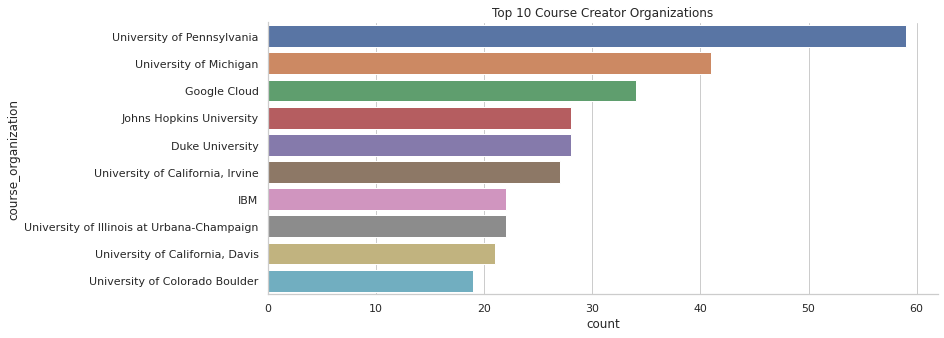

In [47]:
# get the top 10 course creator organization on coursera
topTen = mostFrequent(data, 'course_organization', 10)
plt.figure(figsize = [12,5])
sb.countplot(y='course_organization', data=topTen, order=topTen["course_organization"].value_counts().index)
plt.title("Top 10 Course Creator Organizations")
sb.despine(right = True)
plt.show()

University of Pennslyvania produces largest number of courses offered on coursera.

#### 3.6 Top 10 Organizations With Most Students Enrolled

In [48]:
#get number of students enrolled at each organization
organization_enrollment = pd.DataFrame(data.groupby('course_organization')['course_students_enrolled'].sum())
getTop(organization_enrollment, 'course_students_enrolled', 10)

,course_students_enrolled
course_organization,
University of Michigan,7437700.0
University of Pennsylvania,5501300.0
Stanford University,4854000.0
"University of California, Irvine",4326000.0
Johns Hopkins University,4298900.0
Duke University,3967600.0
Yale University,3952000.0
IBM,2956400.0
deeplearning.ai,2863400.0


#### 3.7 Course Rating and Number of Students Enrolled

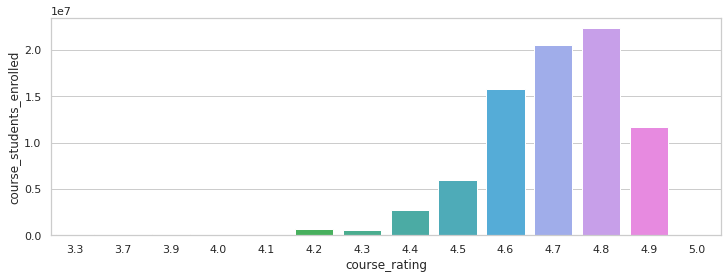

In [49]:
enrollment_rate = data.groupby('course_rating')['course_students_enrolled'].sum().sort_values()
fig, ax = plt.subplots(figsize=(12, 4))
sb.barplot(x = enrollment_rate.index, y = enrollment_rate)
plt.show()

#### 3.8 Average Rating of Courses of each difficulty levels produced by certain organizations

In [50]:
print("IBM average beginner level course rating: ", averageRating(data, 'IBM', 'Beginner'))
print("IBM average intermediate level course rating: ", averageRating(data, 'IBM', 'Intermediate'))

IBM average beginner level course rating:  4.631
IBM average intermediate level course rating:  4.65


Most of the course have rating between 4.6 to 4.9

#### 3.9 Top 10 Most Rated Courses

In [51]:
getTop(data, 'course_rating', 10)[['course_organization', 'course_title', 'course_rating']]

,course_organization,course_title,course_rating
251,Universidad Austral,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Imperial College London,Infectious Disease Modelling,5.0
754,Stanford University,Stories of Infection,4.9
290,Yale University,Everyday Parenting: The ABCs of Child Rearing,4.9
98,HEC Paris,Boosting Creativity for Innovation,4.9
99,London Business School,"Brand Management: Aligning Business, Brand and...",4.9
614,University of Pennsylvania,More Introduction to Financial Accounting,4.9
102,University of Alberta,Bugs 101: Insect-Human Interactions,4.9
836,Stanford University,Understanding Einstein: The Special Theory of ...,4.9
103,Hebrew University of Jerusalem,Build a Modern Computer from First Principles:...,4.9


Insight: There's only two courses with a rating of 5.0

#### 3.10 Top 10 Courses With Many Students Registered

In [52]:
getTop(data, 'course_students_enrolled', 10)[['course_organization', 'course_title', 'course_students_enrolled']]

,course_organization,course_title,course_students_enrolled
564,Stanford University,Machine Learning,3200000.0
815,Yale University,The Science of Well-Being,2500000.0
688,University of Michigan,Python for Everybody,1500000.0
674,University of Michigan,Programming for Everybody (Getting Started wit...,1300000.0
196,Johns Hopkins University,Data Science,830000.0
129,"University of California, Irvine",Career Success,790000.0
261,University of Pennsylvania,English for Career Development,760000.0
765,University of Michigan,Successful Negotiation: Essential Strategies a...,750000.0
199,Johns Hopkins University,Data Science: Foundations using R,740000.0
211,deeplearning.ai,Deep Learning,690000.0


#### 3.10 Most Popular Course Title

In [53]:
data['course_title'].mode()

0    Developing Your Musicianship
1                Machine Learning
2               Marketing Digital
Name: course_title, dtype: object

In [54]:
# most frequent courses
mostFrequent(data,'course_title', 10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000.0
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000.0
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000.0
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000.0
590,Mastering Data Analysis in Excel,Duke University,COURSE,4.2,Mixed,280000.0
591,Mastering Final Cut Pro,LearnQuest,COURSE,4.6,Beginner,8400.0
592,Mastering Software Development in R,Johns Hopkins University,SPECIALIZATION,4.3,Beginner,52000.0


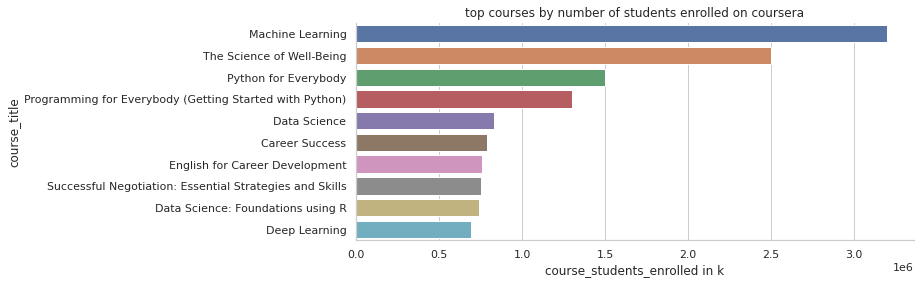

In [55]:
top_enroll = getTop(data, 'course_students_enrolled', 10)
plt.figure(figsize = (10, 4))
sb.barplot(data = top_enroll , x = 'course_students_enrolled' , y = 'course_title')
plt.xlabel("course_students_enrolled in k")
plt.title('top courses by number of students enrolled on coursera');
sb.despine(top = True)

Insight: Courses related to Deep Learning, Machine Learning and Neural Networks have more students enrolled than any other courses

#### 3.11 Compare number of students, rating and course difficulty level

In [56]:
feat1 = 'course_difficulty'
feat2 = 'course_students_enrolled'
df1 = makeQuery(data, 'course_rating', '>=4.7')[[feat1,feat2]]
df2 = makeQuery(data, 'course_rating', '<4.7')[[feat1, feat2]]

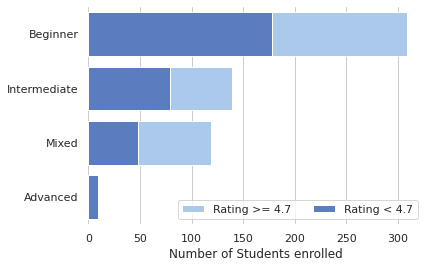

In [57]:
a = df1.groupby(feat1)[feat1].count().sort_values(ascending = False)
b = df2.groupby(feat1)[feat1].count().sort_values(ascending = False)

f, ax = plt.subplots(figsize=(6, 4))
sb.set_color_codes("pastel")
sb.barplot(x=a, y = a.index,label="Rating >= 4.7", color="b")
sb.set_color_codes("muted")
sb.barplot(x=b, y=b.index, label="Rating < 4.7", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Number of Students enrolled")
sb.despine(left=True, bottom=True)

When comparing number of students enrolled in course with greater than 4.7 rating and less than 4.7 rating, we can see that number of students tends to increase in a course with a rating greater than 4.7 except for Advanced Level Courses.

#### 3.12 Relating Feature

In [58]:
relateFeature(data, 'course_difficulty', 'course_rating', 'mean')

,course_difficulty,course_rating
0,Advanced,4.600000
2,Intermediate,4.646465
1,Beginner,4.680903
3,Mixed,4.708556


This shows us that average rating differs slightly between each difficulty levels of courses

#### 3.13 Filtering DataFrame

In [59]:
#course with a rating equal to 5.0
makeQuery(data, 'course_rating', '==5.0')[['course_title', 'course_rating']].sort_values('course_rating')

,course_title,course_rating
251,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Infectious Disease Modelling,5.0


In [60]:
#courses with more than 800k students enrolled
makeQuery(data, 'course_students_enrolled', '>500000').sort_values('course_students_enrolled', ascending = False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
129,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
261,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760000.0
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
211,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000.0


In [61]:
#search courses with some keyword included in titles
dataScience = findByName(data, 'course_title', 'Data Science')
dataScience

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
27,Advanced Data Science with IBM,IBM,SPECIALIZATION,4.4,Advanced,320000.0
54,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220000.0
55,Applied Data Science Capstone,IBM,COURSE,4.7,Intermediate,42000.0
56,Applied Data Science with Python,University of Michigan,SPECIALIZATION,4.5,Intermediate,480000.0
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
197,Data Science Math Skills,Duke University,COURSE,4.5,Beginner,140000.0
198,Data Science Methodology,IBM,COURSE,4.6,Beginner,89000.0
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
200,Data Science: Statistics and Machine Learning,Johns Hopkins University,SPECIALIZATION,4.4,Intermediate,210000.0


#### Compare Data Related Courses With Other Courses on the Coursera

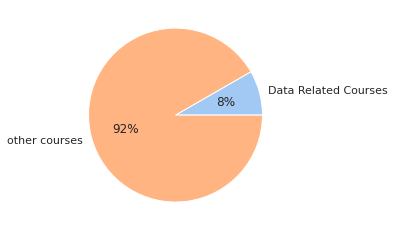

In [62]:
count = dataScience.shape[0]
for title in ['Machine Learning', 'Artificial Intelligence', 'AI', 'Deep Learning', 'Neural Networks', 'Big Data']:
    count += findByName(data, 'course_title', title).shape[0]
metrics = [count, data.shape[0]-count]
colors = sb.color_palette('pastel')
plt.pie(metrics, labels=["Data Related Courses", "other courses"], colors=colors, autopct='%.0f%%')
plt.show()

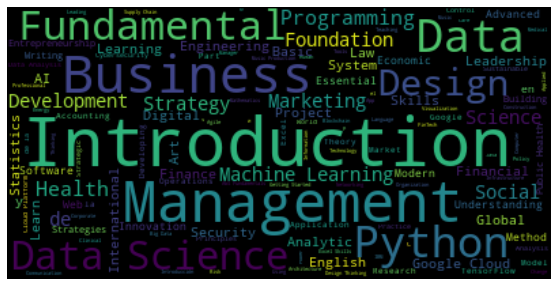

In [63]:
wordcloud = WordCloud().generate(data['course_title'].to_string())
f,ax=plt.subplots(1,1,figsize=(25,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Insights and Conclusion
The following are insights that we can get from this dataset:
<ol>
    <li>Popular courses are general courses, in contrary to Advanced  and specialization courses</li>
    <li>Professional and Mixed difficulty type of courses are the courses with the most students enrolled in</li>
    <li>University of Pennslyvania is the organization with the most published courses in coursera</li>
    <li>8% of the coursera courses are related to Data i.e Data Science, Machine Learning, Deep Learning, AI</li>
    <li>Number of enrolled students tends to increase with course rating till a threshold of 4.8 rating
<ol>